# Final lab

*20 points + 5 extra credit points*

**Due before May 6, 2023 at 1pm Pacific**

This is an individual assignment so please do not work together on your submissions. However, this is an open notes and resources assignment, so please use your previous labs and Google/GitHub/Stack Overflow to help you complete the lab. 

Your instructor will be available between 9am and 1pm on May 6 to help answer any of your questions related to the final lab.

## 1. Please use `pip` to install `rioxarray`, `geopandas`, `earthpy`, and `folium`

``` bash
!pip install library1 library2
```
> Note: Don't forget to include an `!` before `pip` when running it in Google Colaboratory 

Worth *2.5 points*

In [2]:
!pip install rioxarray geopandas earthpy folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.6 MB/s eta 0:00:00


## 2. Import the necessary packages:
1.  os: `import os`
1. glob: `from glob import glob`
1. pyplot: `import matplotlib.pyplot as plt`
1. numpy: `import numpy as np`
1. geopandas: `import geopandas as gpd`
1. xarray: `import xarray as xr`
1. rioxarray: `import rioxarray as rxr`
1. earthpy: `import earthpy as et`
1. earthpy.spatial: `import earthpy.spatial as es`
1. earthpy.plot: `import earthpy.plot as ep`

Worth *2.5 points*

In [3]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

## 3. Get data and set the working directory
1. Create a variable called `data` equal to `et.data.get_data()` and pass `"cold-springs-fire"` as the input parameter to `get_data`, i.e. `et.data.get_data(input_parameter_goes_here)`
1. Change the current working directory to `os.path.join(et.io.HOME, "earth-analytics", "data"))`, i.e. `os.chdir(replace_with_os_path_join_stuff)`

Worth *2.5 points*

In [4]:
#data variable
data = et.data.get_data("cold-springs-fire") 

#change directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))


Extracted output to /root/earth-analytics/data/cold-springs-fire/.


## 4. Get a list of pre-cropped data then sort it
1. Create a variable called `landsat_post_fire_path` and set it equal to `os.path.join("cold-springs-fire", "landsat_collect", "LC080340322016072301T1-SC20180214145802", "crop")`
1. Create a variable called `post_fire_paths` (list of the TIF file names) and set it equal to `glob(os.path.join(landsat_post_fire_path, "*band*.tif"))`
1. Sort the `post_fire_paths` variable with `.sort()`, i.e. `post_fire_paths.sort()`
1. Display the sorted variable contents, i.e type `post_fire_paths` and run the code cell

Worth *2.5 points*

In [5]:
#variable 1
landsat_post_fire_path = os.path.join("cold-springs-fire", "landsat_collect", "LC080340322016072301T1-SC20180214145802", "crop")

#variable 2
post_fire_paths = glob(os.path.join(landsat_post_fire_path, "*band*.tif"))

#sort
post_fire_paths.sort()

#display
post_fire_paths





['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

## 5. Open the TIF data as a rioxarray object

In [6]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()


# Open all bands in a loop
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

# Turn list of bands into a single xarray object    
landsat_post_fire_xr = xr.concat(all_bands, dim="band") 

## 6. Plot the `landsat_post_fire_xr` variable 
1. Use `plot.imshow()` method, i.e. `rioxarray_variable.plot.imshow()`
1. Set some styling parameters for the visualization, i.e. `rioxarray_variable.plot.imshow(col="band", col_wrap=3, cmap="Greys_r")`
1. Invoke `pyplot` to display the visualization, i.e. `plt.show()`

Worth *2.5 points*

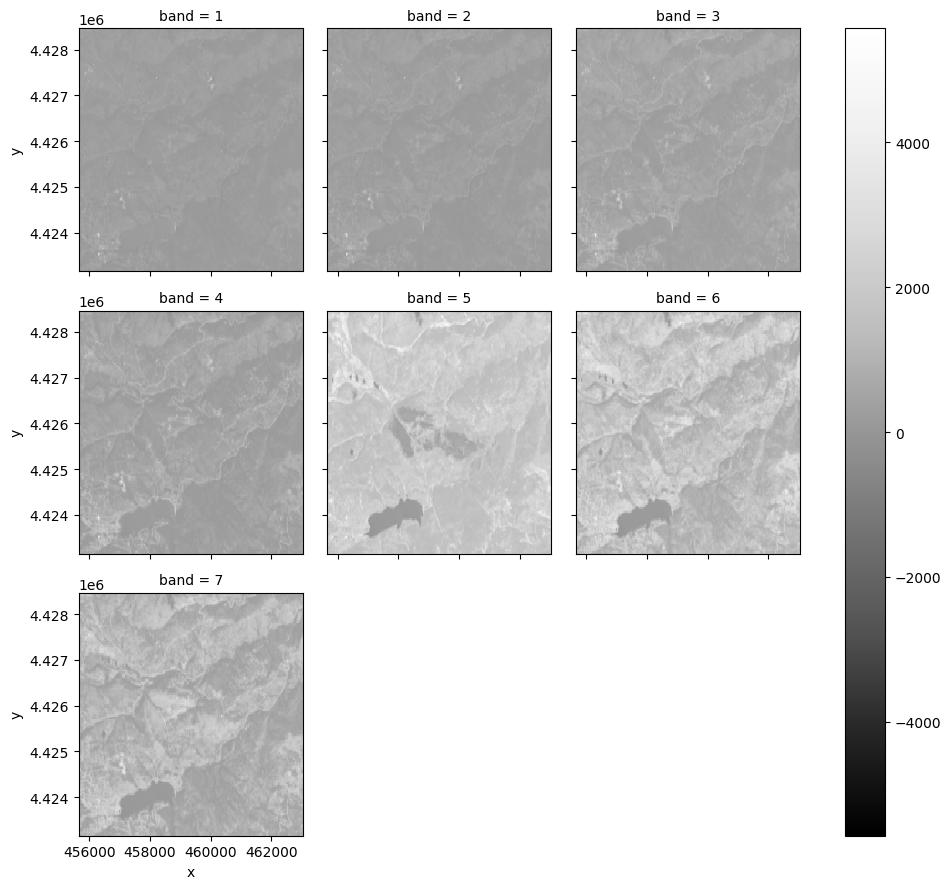

In [7]:
landsat_post_fire_xr.plot.imshow(col="band", col_wrap=3, cmap="Greys_r")

plt.show()

## 7. Calculate the [Normalized Difference Moisture Index (NDMI)](https://www.usgs.gov/landsat-missions/normalized-difference-moisture-index)
In Landsat 8-9, NDMI = (Band 5 – Band 6) / (Band 5 + Band 6).

1. Create a variable called `ndmi` and set it equal to `es.normalized_diff(landsat_post_fire_xr[5], landsat_post_fire_xr[4])`

Worth *2.5 points*

In [8]:
ndmi = es.normalized_diff(landsat_post_fire_xr[5], landsat_post_fire_xr[4])

## 8. Plot the NDMI raster
1. Create a variable called `titles` and set it equal to `["Landsat 8 - Normalized Difference Moisture Index (NDMI)"]`
1. Use `ep.plot_bands()` to plot the `ndmi` variable like this `ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)`
1. Invoke `plt.show()` to display the visualization

Worth *2.5 points*

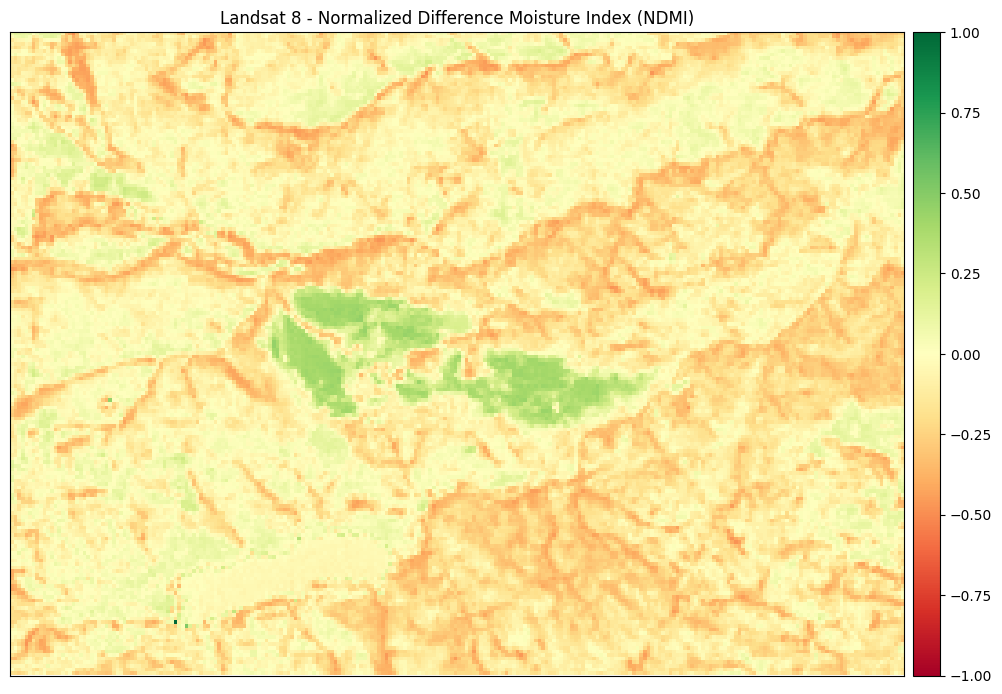

In [9]:
titles = ["Landsat 8 - Normalized Difference Moisture Index (NDMI)"]
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)
plt.show()



## 9. Optional extra credit

1. https://www.linkedin.com/in/valeria-rodriguez-784675213/
2. No Twitter
3. NDWI, nicest to look at. 
4. earthpy, really helpful.
5. Top 5: Talking Heads, Radiohead, Beach house, Animal Collective, Interpol (No specific Order)


Worth *5 points*

## 10. Demonstrate your GitHub skills
1. Download your final lab Jupyter Notebook
1. Create a new GitHub repository in your personal account for the final lab submission
    1. Please make the repository public, include a README.md, and select an MIT License
1. Add/upload your final lab Jupyter Notebook to your newly created repository
    1. Copy the link/URL of your newly created repository as you'll need it soon
1. Log into Canvas and navigate to the GISC 606 course
1. Open the final lab assignment and input the link to your final lab repository as your submission

Worth *2.5 points*
